##Dataset Preprocessing and Visualization

In [ ]:
 import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
import matplotlib.animation as animation
%matplotlib inline


In [ ]:
url='https://raw.githubusercontent.com/roma27/Stack-overflow-FODS/master/survey_results_public.csv'

In [ ]:
df=pd.read_csv(url)

In [ ]:
dataset=df.copy()

Datatype of each columns

In [ ]:
df.dtypes

Respondent              int64
MainBranch             object
Hobbyist               object
Age                   float64
Age1stCode             object
                       ...   
WebframeWorkedWith     object
WelcomeChange          object
WorkWeekHrs           float64
YearsCode              object
YearsCodePro           object
Length: 61, dtype: object

Checking for null values in each column

In [ ]:
df.isnull().sum()

Respondent                0
MainBranch              299
Hobbyist                 45
Age                   19015
Age1stCode             6561
                      ...  
WebframeWorkedWith    22182
WelcomeChange         11778
WorkWeekHrs           23310
YearsCode              6777
YearsCodePro          18112
Length: 61, dtype: int64

**Main Branch column**

In [ ]:
df['MainBranch'].value_counts()

I am a developer by profession                                                   47193
I am a student who is learning to code                                            7970
I am not primarily a developer, but I write code sometimes as part of my work     5502
I code primarily as a hobby                                                       2314
I used to be a developer by profession, but no longer am                          1183
Name: MainBranch, dtype: int64

In [ ]:
df['MainBranch'].fillna(method='ffill',inplace=True)

In [ ]:
df['MainBranch']

0                           I am a developer by profession
1                           I am a developer by profession
2                              I code primarily as a hobby
3                           I am a developer by profession
4        I used to be a developer by profession, but no...
                               ...                        
64456               I am a student who is learning to code
64457               I am a student who is learning to code
64458               I am a student who is learning to code
64459               I am a student who is learning to code
64460               I am a student who is learning to code
Name: MainBranch, Length: 64461, dtype: object

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['MainBranch']= label_encoder.fit_transform(df['MainBranch'])

In [ ]:

df['MainBranch'].value_counts()

0    47193
1     8269
2     5502
3     2314
4     1183
Name: MainBranch, dtype: int64

**Hobbyist column preprocessing**

In [ ]:
df['Hobbyist'].value_counts()

Yes    50388
No     14028
Name: Hobbyist, dtype: int64

In [ ]:
df['Hobbyist'].fillna(method='bfill',inplace=True)

In [ ]:
df['Hobbyist'].value_counts()

Yes    50426
No     14035
Name: Hobbyist, dtype: int64

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['Hobbyist']= label_encoder.fit_transform(df['Hobbyist'])

In [ ]:
df['Age'].value_counts()

25.0    2693
28.0    2412
30.0    2406
26.0    2391
27.0    2338
        ... 
23.8       1
95.0       1
31.5       1
20.5       1
16.5       1
Name: Age, Length: 110, dtype: int64

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

**Age1stCode column preprocessing**

In [ ]:
df['Age1stCode'].value_counts()

15    5618
14    5514
16    5463
18    5382
12    5081
      ... 
68       1
83       1
76       1
63       1
72       1
Name: Age1stCode, Length: 63, dtype: int64

In [ ]:
df['Age1stCode'].isnull().sum()

6561

In [ ]:
df['Age1stCode'].fillna('-1',inplace=True)

In [ ]:
df['Age1stCode'].replace('Younger than 5 years', '0',inplace =True)

In [ ]:
df['Age1stCode'].replace('Older than 85', '85',inplace =True)

In [ ]:
df['Age1stCode'].isnull().sum()

0

In [ ]:
df[df['Age1stCode']=='Younger than 5 years']

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro


In [ ]:
df[df['Age1stCode']=='Older than 85']


,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro


In [ ]:
df['Age1stCode']=df['Age1stCode'].astype(int)

In [ ]:
import math
df['Age1stCode'].replace(-1,math.floor(df['Age1stCode'].mean()),inplace=True)

In [ ]:
df['Age1stCode'].value_counts()

13    10748
15     5618
14     5514
16     5463
18     5382
      ...  
72        1
76        1
83        1
68        1
63        1
Name: Age1stCode, Length: 62, dtype: int64

**CompFreq column preprocessing**

In [ ]:
df['CompFreq'].value_counts()

Yearly     19818
Monthly    18899
Weekly      1352
Name: CompFreq, dtype: int64

In [ ]:
df['CompFreq'].isnull().sum()

24392

In [ ]:
df['CompFreq'].fillna(method='ffill',inplace=True)

In [ ]:
df['CompFreq'].unique()

array(['Monthly', 'Yearly', 'Weekly'], dtype=object)

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['CompFreq']= label_encoder.fit_transform(df['CompFreq'])

**CompTotal column preprocessing**

In [ ]:
df['CompTotal'].value_counts()

100000.0       769
60000.0        735
50000.0        717
120000.0       660
70000.0        617
              ... 
1940000.0        1
232500000.0      1
11770.0          1
77777.0          1
49150.0          1
Name: CompTotal, Length: 3003, dtype: int64

In [ ]:
df['CompTotal'].isnull().sum()

29635

In [ ]:

df['CompTotal'].fillna(df['CompTotal'].mean(),inplace=True)

In [ ]:
newdf=df[df['CompFreq']==1]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:296: RuntimeWarning: overflow encountered in square
  scale = np.sqrt(((data - loc)**2).mean())


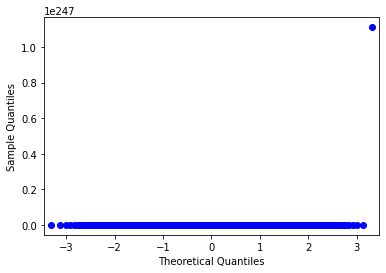

In [ ]:

import statsmodels.api as sm
from scipy.stats import norm
import pylab

my_data = norm.rvs(size=1000)
sm.qqplot(newdf['CompTotal'])
pylab.show()

**ConvertedComp column preprocessing**

In [ ]:
df['ConvertedComp'].value_counts()

120000.0     341
100000.0     306
150000.0     277
2000000.0    258
1000000.0    258
            ... 
102700.0       1
68721.0        1
96250.0        1
38456.0        1
21487.0        1
Name: ConvertedComp, Length: 6958, dtype: int64

In [ ]:
df['ConvertedComp'].isnull().sum()

29705

In [ ]:
df['ConvertedComp'].fillna(df['ConvertedComp'].mean(),inplace=True)

**Country column preprocessing**

In [ ]:
df['Country'].value_counts()

United States       12469
India                8403
United Kingdom       3896
Germany              3890
Canada               2191
                    ...  
Liechtenstein           1
Mali                    1
Saint Lucia             1
Fiji                    1
Marshall Islands        1
Name: Country, Length: 183, dtype: int64

In [ ]:
df['Country'].isnull().sum()

389

In [ ]:
df['Country'].fillna(method='bfill',inplace=True)

**CurrencyDesc column preprocessing**

In [ ]:
df['CurrencyDesc'].isnull().sum()

18989

In [ ]:
df['CurrencyDesc'].fillna(method='ffill',inplace=True)

**CurrencySymbol column preprocessing**

In [ ]:
df['CurrencySymbol'].isnull().sum()

18989

In [ ]:
df['CurrencySymbol'].fillna(method='ffill',inplace=True)

**DatabaseDesireNextYear column preprocessing**

In [ ]:
df['DatabaseDesireNextYear'].value_counts()

PostgreSQL                                                                                 2310
Microsoft SQL Server                                                                       1947
MySQL                                                                                      1823
MongoDB                                                                                    1624
SQLite                                                                                      966
                                                                                           ... 
Cassandra;DynamoDB;MariaDB;MongoDB;MySQL;Redis                                                1
Cassandra;Couchbase;DynamoDB;Elasticsearch;Firebase;MongoDB;MySQL;Oracle                      1
Cassandra;Couchbase;Elasticsearch;MySQL;PostgreSQL                                            1
Cassandra;DynamoDB;Elasticsearch;Firebase;MariaDB;MongoDB;MySQL;Oracle;PostgreSQL;Redis       1
Cassandra;Couchbase;DynamoDB;Elasticsear

In [ ]:
df['DatabaseDesireNextYear'].isnull().sum()

20391

In [ ]:
df['DatabaseDesireNextYear'].fillna(method='bfill',inplace=True)

DatabaseWorkedWith column preprocessing

In [ ]:
df['DatabaseWorkedWith'].value_counts()

MySQL                                                                                                        3827
Microsoft SQL Server                                                                                         3298
PostgreSQL                                                                                                   1937
SQLite                                                                                                       1313
Microsoft SQL Server;MySQL                                                                                   1158
                                                                                                             ... 
Cassandra;DynamoDB;Elasticsearch;Oracle;PostgreSQL;Redis;SQLite                                                 1
Cassandra;Couchbase;DynamoDB;Firebase;IBM DB2;MariaDB;Microsoft SQL Server;MySQL;Oracle;PostgreSQL;SQLite       1
Cassandra;DynamoDB;Elasticsearch;Firebase;MongoDB;MySQL;Oracle;PostgreSQL;Redis;SQLite  

In [ ]:
df['DatabaseWorkedWith'].isnull().sum()

14924

In [ ]:
df['DatabaseWorkedWith'].fillna(method='bfill',inplace=True)

DevType column preprocessing

In [ ]:
df['DevType'].value_counts()

Developer, full-stack                                                                                                                                                                                           4424
Developer, back-end                                                                                                                                                                                             3086
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                                  2227
Developer, back-end;Developer, full-stack                                                                                                                                                                       1476
Developer, front-end                                                                                                                                

In [ ]:
df['DevType'].isnull().sum()

15091

In [ ]:
df['DevType'].fillna(method='ffill',inplace=True)

In [ ]:
df['DevType'].isnull().sum()

0

**EdLevel column preprocessing**

In [ ]:
df['EdLevel'].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          26542
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       13112
Some college/university study without earning a degree                                 7239
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     4771
Associate degree (A.A., A.S., etc.)                                                    1843
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1690
Primary/elementary school                                                               941
Professional degree (JD, MD, etc.)                                                      800
I never completed any formal education                                                  493
Name: EdLevel, dtype: int64

In [ ]:
df['EdLevel'].isnull().sum()

7030

In [ ]:
df['EdLevel'].fillna(method='ffill',inplace=True)

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['EdLevel']= label_encoder.fit_transform(df['EdLevel'])

**Employment column preprocessing**

In [ ]:
df['Employment'].value_counts()

Employed full-time                                      45270
Student                                                  7787
Independent contractor, freelancer, or self-employed     5672
Not employed, but looking for work                       2343
Employed part-time                                       2217
Not employed, and not looking for work                    322
Retired                                                   243
Name: Employment, dtype: int64

In [ ]:
df['Employment'].isnull().sum()

607

In [ ]:
df['Employment'].fillna(method='ffill',inplace=True)

**Ethnicity column preprocessing**

In [ ]:
df['Ethnicity'].isnull().sum()

18513

In [ ]:
df['Ethnicity'].fillna(method='ffill',inplace=True)
df['Ethnicity'].isnull().sum()

0

**Gender**

In [ ]:
df['Gender'].isnull().sum()

13904

In [ ]:
df['Gender'].fillna(method='ffill',inplace=True)
df['Gender'].isnull().sum()

0

Job factors

In [ ]:
df['JobFactors'].isnull().sum()

15112

In [ ]:
df['JobFactors'].value_counts()

Flex time or a flexible schedule;Languages, frameworks, and other technologies I’d be working with;Remote work options                                2777
Languages, frameworks, and other technologies I’d be working with;Office environment or company culture;Opportunities for professional development    2570
Flex time or a flexible schedule;Languages, frameworks, and other technologies I’d be working with;Office environment or company culture              2508
Flex time or a flexible schedule;Languages, frameworks, and other technologies I’d be working with;Opportunities for professional development         1666
Flex time or a flexible schedule;Office environment or company culture;Opportunities for professional development                                     1650
                                                                                                                                                      ... 
Diversity of the company or organization;Remote work options          

In [ ]:
df['JobFactors'].fillna(method='ffill',inplace=True)
df['JobFactors'].isnull().sum()

0

JobSat

In [ ]:
df['JobSat'].value_counts()

Very satisfied                        14611
Slightly satisfied                    13930
Slightly dissatisfied                  7124
Neither satisfied nor dissatisfied     5783
Very dissatisfied                      3746
Name: JobSat, dtype: int64

In [ ]:
df['JobSat'].isnull().sum()

19267

In [ ]:
df['JobSat'].fillna(method='ffill',inplace=True)
df['JobSat'].isnull().sum()

0

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['JobSat']= label_encoder.fit_transform(df['JobSat'])

JobSeek

In [ ]:
df['JobSeek'].isnull().sum()

12734

In [ ]:
df['JobSeek'].value_counts()

I’m not actively looking, but I am open to new opportunities    29776
I am not interested in new job opportunities                    13001
I am actively looking for a job                                  8950
Name: JobSeek, dtype: int64

In [ ]:
df['JobSeek'].fillna(method='ffill',inplace=True)
df['JobSeek'].isnull().sum()

0

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['JobSeek']= label_encoder.fit_transform(df['JobSeek'])

LanguageDesireNextYear

In [ ]:
df['LanguageDesireNextYear'].isnull().sum()

10348

In [ ]:
df['LanguageDesireNextYear'].value_counts()

Python                                                                                              1152
Rust                                                                                                 528
HTML/CSS;JavaScript;TypeScript                                                                       499
C#                                                                                                   461
Go                                                                                                   412
                                                                                                    ... 
Bash/Shell/PowerShell;C;C#;C++;HTML/CSS;Java;JavaScript;Kotlin;Perl;PHP;Python;SQL                     1
C#;C++;R;SQL;VBA                                                                                       1
Assembly;Bash/Shell/PowerShell;C;C++;Dart;Haskell;HTML/CSS;JavaScript;Python;Rust;SQL;TypeScript       1
Assembly;C#;C++;Dart;Go;HTML/CSS;Java;JavaScript;Julia;

In [ ]:
df['LanguageDesireNextYear'].fillna(method='ffill',inplace=True)
df['LanguageDesireNextYear'].isnull().sum()

0

LanguageWorkedWith

In [ ]:
df['LanguageWorkedWith'].value_counts()

HTML/CSS;JavaScript;PHP;SQL                                         1073
HTML/CSS;JavaScript                                                  900
C#;HTML/CSS;JavaScript;SQL                                           856
C#;HTML/CSS;JavaScript;SQL;TypeScript                                754
HTML/CSS;JavaScript;TypeScript                                       697
                                                                    ... 
C;Python;R;Rust                                                        1
Assembly;C;C++;Haskell;Java;Python;SQL                                 1
C;C++;Java;Kotlin;SQL                                                  1
Bash/Shell/PowerShell;C;C++;Go;Haskell;JavaScript;Rust;Scala;SQL       1
Bash/Shell/PowerShell;JavaScript;PHP;Python;Swift;TypeScript           1
Name: LanguageWorkedWith, Length: 14256, dtype: int64

In [ ]:
df['LanguageWorkedWith'].isnull().sum()

7083

In [ ]:

df['LanguageWorkedWith'].fillna(method='ffill',inplace=True)
df['LanguageWorkedWith'].isnull().sum()

0

MiscTechDesireNextYear

In [ ]:
df['MiscTechDesireNextYear'].value_counts()

Node.js                                                               4134
Node.js;React Native                                                  1615
.NET;.NET Core                                                        1484
.NET Core                                                             1218
Flutter                                                               1009
                                                                      ... 
.NET Core;Apache Spark;Node.js;Unity 3D                                  1
.NET Core;Ansible;Apache Spark;Cordova;Node.js;Pandas;React Native       1
.NET;Apache Spark;Node.js;Xamarin                                        1
.NET Core;Flutter;React Native;TensorFlow;Torch/PyTorch;Xamarin          1
.NET;.NET Core;Apache Spark;Flutter;Node.js;React Native                 1
Name: MiscTechDesireNextYear, Length: 5216, dtype: int64

In [ ]:
df['MiscTechDesireNextYear'].isnull().sum()

22082

In [ ]:

df['MiscTechDesireNextYear'].fillna(method='ffill',inplace=True)
df['MiscTechDesireNextYear'].isnull().sum()

0

MiscTechWorkedWith

In [ ]:
df['MiscTechWorkedWith'].isnull().sum()

24147

In [ ]:
df['MiscTechWorkedWith'].value_counts()

Node.js                                                                         7151
.NET;.NET Core                                                                  3215
.NET                                                                            2601
.NET;.NET Core;Node.js                                                          1601
Pandas                                                                          1356
                                                                                ... 
.NET Core;Apache Spark;Cordova;Hadoop;Node.js;Pandas                               1
.NET;.NET Core;Keras;Pandas;Torch/PyTorch;Xamarin                                  1
.NET;.NET Core;Keras;Node.js;TensorFlow;Torch/PyTorch;Unity 3D;Unreal Engine       1
.NET;Chef;Flutter;Node.js;Pandas                                                   1
.NET;.NET Core;Ansible;Keras;Node.js;TensorFlow;Unity 3D                           1
Name: MiscTechWorkedWith, Length: 2730, dtype: int64

In [ ]:

df['MiscTechWorkedWith'].fillna(method='ffill',inplace=True)
df['MiscTechWorkedWith'].isnull().sum()

0

NEWCollabToolsDesireNextYear

In [ ]:

df['NEWCollabToolsDesireNextYear'].isnull().sum()

17174

In [ ]:
df['NEWCollabToolsDesireNextYear'].fillna(method='ffill',inplace=True)
df['NEWCollabToolsDesireNextYear'].isnull().sum()

0

In [ ]:
df['NEWCollabToolsDesireNextYear'].value_counts()

Github                                                                                                                      6502
Github;Gitlab                                                                                                               2762
Github;Slack                                                                                                                2376
Github;Slack;Google Suite (Docs, Meet, etc)                                                                                 1807
Github;Google Suite (Docs, Meet, etc)                                                                                       1555
                                                                                                                            ... 
Confluence;Jira;Gitlab;Slack;Microsoft Teams;Trello;Google Suite (Docs, Meet, etc);Stack Overflow for Teams                    1
Github;Gitlab;Facebook Workplace;Slack;Microsoft Teams                                           

NEWCollabToolsWorkedWith

In [ ]:

df['NEWCollabToolsWorkedWith'].isnull().sum()

11578

In [ ]:
df['NEWCollabToolsWorkedWith'].fillna(method='ffill',inplace=True)
df['NEWCollabToolsWorkedWith'].isnull().sum()

0

In [ ]:
df['NEWCollabToolsWorkedWith'].value_counts()

Github                                                                                               5428
Github;Gitlab                                                                                        1877
Confluence;Jira;Github;Slack;Google Suite (Docs, Meet, etc)                                          1528
Github;Slack                                                                                         1513
Github;Google Suite (Docs, Meet, etc)                                                                1471
                                                                                                     ... 
Gitlab;Facebook Workplace;Stack Overflow for Teams                                                      1
Confluence;Jira;Microsoft Azure;Trello;Stack Overflow for Teams                                         1
Facebook Workplace;Slack;Microsoft Teams;Microsoft Azure                                                1
Confluence;Jira;Facebook Workplace;Google Suit

NEWDevOps

In [ ]:

df['NEWDevOps'].isnull().sum()

21775

In [ ]:
df['NEWDevOps'].fillna(method='ffill',inplace=True)
df['NEWDevOps'].isnull().sum()

0

In [ ]:
df['NEWDevOps'].value_counts()

Yes         28447
No          27956
Not sure     8058
Name: NEWDevOps, dtype: int64

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['NEWDevOps']= label_encoder.fit_transform(df['NEWDevOps'])

NEWDevOpsImpt

In [ ]:

df['NEWDevOpsImpt'].isnull().sum()

22729

In [ ]:
df['NEWDevOpsImpt'].fillna(method='ffill',inplace=True)
df['NEWDevOpsImpt'].isnull().sum()

0

In [ ]:
df['NEWDevOpsImpt'].value_counts()

Extremely important     31076
Somewhat important      19461
Neutral                 11632
Not very important       1330
Not at all important      962
Name: NEWDevOpsImpt, dtype: int64

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['NEWDevOpsImpt']= label_encoder.fit_transform(df['NEWDevOpsImpt'])

NEWEdImpt

In [ ]:

df['NEWEdImpt'].isnull().sum()

15996

In [ ]:
df['NEWEdImpt'].fillna(method='ffill',inplace=True)
df['NEWEdImpt'].isnull().sum()

0

In [ ]:
df['NEWEdImpt'].value_counts()

Fairly important                      16861
Very important                        15893
Somewhat important                    14974
Not at all important/not necessary    10389
Critically important                   6344
Name: NEWEdImpt, dtype: int64

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['NEWEdImpt']= label_encoder.fit_transform(df['NEWEdImpt'])

NEWJobHunt

In [ ]:

df['NEWJobHunt'].isnull().sum()

22175

In [ ]:
df['NEWJobHunt'].fillna(method='ffill',inplace=True)
df['NEWJobHunt'].fillna(method='bfill',inplace=True)
df['NEWJobHunt'].isnull().sum()

0

In [ ]:
df['NEWJobHunt'].value_counts()

Curious about other opportunities;Better compensation;Wanting to work with new technologies;Growth or leadership opportunities                                                                                                                                     1631
Curious about other opportunities;Better compensation;Better work/life balance;Wanting to work with new technologies;Growth or leadership opportunities                                                                                                            1622
Better compensation                                                                                                                                                                                                                                                1346
Curious about other opportunities;Better compensation;Better work/life balance;Wanting to work with new technologies                                                                                            

NEWJobHuntResearch

In [ ]:
df['NEWJobHuntResearch'].isnull().sum()

23439

In [ ]:
df['NEWJobHuntResearch'].fillna(method='ffill',inplace=True)

df['NEWJobHuntResearch'].fillna(method='bfill',inplace=True)
df['NEWJobHuntResearch'].isnull().sum()

0

In [ ]:
df['NEWJobHuntResearch'].value_counts()

Read company media, such as employee blogs or company culture videos;Company reviews from third party sites (e.g. Glassdoor, Blind);Publicly available financial information (e.g. Crunchbase);Personal network - friends or family;Read other media like news articles, founder profiles, etc. about the company;Directly asking current or past employees at the company    3918
Read company media, such as employee blogs or company culture videos;Company reviews from third party sites (e.g. Glassdoor, Blind);Personal network - friends or family                                                                                                                                                                                                      3715
Read company media, such as employee blogs or company culture videos;Company reviews from third party sites (e.g. Glassdoor, Blind)                                                                                                                               

NEWLearn

In [ ]:
df['NEWLearn'].isnull().sum()

8305

In [ ]:
df['NEWLearn'].fillna(method='bfill',inplace=True)
df['NEWLearn'].isnull().sum()

0

In [ ]:
df['NEWLearn'].value_counts()

Every few months        24264
Once a year             23678
Once every few years    15064
Once a decade            1455
Name: NEWLearn, dtype: int64

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['NEWLearn']= label_encoder.fit_transform(df['NEWLearn'])

NEWOffTopic

In [ ]:
df['NEWOffTopic'].isnull().sum()


13657

In [ ]:
df['NEWOffTopic'].fillna(method='ffill',inplace=True)
df['NEWOffTopic'].isnull().sum()


0

In [ ]:
df['NEWOffTopic'].value_counts()

Not sure    25611
No          23266
Yes         15584
Name: NEWOffTopic, dtype: int64

NEWOnboardGood

In [ ]:
df['NEWOnboardGood'].isnull().sum()


21838

In [ ]:
df['NEWOnboardGood'].fillna(method='ffill',inplace=True)
df['NEWOnboardGood'].fillna(method='bfill',inplace=True)
df['NEWOnboardGood'].isnull().sum()


0

In [ ]:
df['NEWOnboardGood'].value_counts()

Yes                             31649
No                              19014
Onboarding? What onboarding?    13798
Name: NEWOnboardGood, dtype: int64

NEWOtherComms

In [ ]:
df['NEWOtherComms'].isnull().sum()


7256

In [ ]:
df['NEWOtherComms'].fillna(method='ffill',inplace=True)
df['NEWOtherComms'].isnull().sum()


0

In [ ]:
df['NEWOtherComms'].value_counts()

No     37207
Yes    27254
Name: NEWOtherComms, dtype: int64

NEWOvertime

In [ ]:
df['NEWOvertime'].isnull().sum()


21230

In [ ]:
df['NEWOvertime'].fillna(method='ffill',inplace=True)
df['NEWOvertime'].isnull().sum()


0

In [ ]:
df['NEWOvertime'].value_counts()

Sometimes: 1-2 days per month but less than weekly          17025
Often: 1-2 days per week or more                            16606
Occasionally: 1-2 days per quarter but less than monthly    13882
Rarely: 1-2 days per year or less                            9785
Never                                                        7163
Name: NEWOvertime, dtype: int64

NEWPurchaseResearch

In [ ]:
df['NEWPurchaseResearch'].isnull().sum()


27140

In [ ]:
df['NEWPurchaseResearch'].fillna(method='ffill',inplace=True)
df['NEWPurchaseResearch'].isnull().sum()


0

In [ ]:
df['NEWPurchaseResearch'].value_counts()

Start a free trial;Ask developers I know/work with;Visit developer communities like Stack Overflow                                                                                            12598
Start a free trial;Ask developers I know/work with                                                                                                                                             7981
Start a free trial                                                                                                                                                                             6249
Start a free trial;Ask developers I know/work with;Visit developer communities like Stack Overflow;Read ratings or reviews on third party sites like G2Crowd                                   5381
Start a free trial;Visit developer communities like Stack Overflow                                                                                                                             4816
                    

NEWPurpleLink

In [ ]:
df['NEWPurpleLink'].isnull().sum()


9658

In [ ]:
df['NEWPurpleLink'].fillna(method='ffill',inplace=True)
df['NEWPurpleLink'].isnull().sum()


0

In [ ]:
df['NEWPurpleLink'].value_counts()

Hello, old friend    33051
Indifferent          11785
Amused               10171
Annoyed               9454
Name: NEWPurpleLink, dtype: int64

NEWSOSites

In [ ]:
df['NEWSOSites'].isnull().sum()


6186

In [ ]:
df['NEWSOSites'].fillna(method='ffill',inplace=True)
df['NEWSOSites'].isnull().sum()


0

In [ ]:
df['NEWSOSites'].value_counts()

Stack Overflow (public Q&A for anyone who codes);Stack Exchange (public Q&A for a variety of topics)                                                                                                                                                                24621
Stack Overflow (public Q&A for anyone who codes);Stack Exchange (public Q&A for a variety of topics);Stack Overflow Jobs (for job seekers)                                                                                                                          15003
Stack Overflow (public Q&A for anyone who codes)                                                                                                                                                                                                                    14497
Stack Overflow (public Q&A for anyone who codes);Stack Overflow Jobs (for job seekers)                                                                                                                    

NEWStuck

In [ ]:
df['NEWStuck'].isnull().sum()


9478

In [ ]:
df['NEWStuck'].fillna(method='ffill',inplace=True)
df['NEWStuck'].isnull().sum()


0

In [ ]:
df['NEWStuck'].value_counts()

Visit Stack Overflow                                                                                                                                           3633
Call a coworker or friend;Visit Stack Overflow;Watch help / tutorial videos                                                                                    3465
Visit Stack Overflow;Watch help / tutorial videos                                                                                                              3433
Call a coworker or friend;Visit Stack Overflow;Do other work and come back later                                                                               2670
Call a coworker or friend;Visit Stack Overflow                                                                                                                 2620
                                                                                                                                                               ... 
Meditate;Play ga

OpSys

In [ ]:
df['OpSys'].isnull().sum()



8233

In [ ]:
df['OpSys'].fillna(method='ffill',inplace=True)
df['OpSys'].isnull().sum()


0

In [ ]:
df['OpSys'].value_counts()

Windows        31280
Linux-based    17165
MacOS          15960
BSD               56
Name: OpSys, dtype: int64

OrgSize

In [ ]:
df['OrgSize'].isnull().sum()


20127

In [ ]:
df['OrgSize'].fillna(method='ffill',inplace=True)
df['OrgSize'].isnull().sum()


0

In [ ]:
df['OrgSize'].value_counts()

20 to 99 employees                                    14105
100 to 499 employees                                  12014
10,000 or more employees                               8761
1,000 to 4,999 employees                               6975
2 to 9 employees                                       6406
10 to 19 employees                                     6116
500 to 999 employees                                   4207
Just me - I am a freelancer, sole proprietor, etc.     3266
5,000 to 9,999 employees                               2611
Name: OrgSize, dtype: int64

PlatformDesireNextYear

In [ ]:
df['PlatformDesireNextYear'].isnull().sum()



13856

In [ ]:
df['PlatformDesireNextYear'].fillna(method='ffill',inplace=True)
df['PlatformDesireNextYear'].isnull().sum()


0

In [ ]:
df['PlatformDesireNextYear'].value_counts()

Linux                                                                                                                                     2563
Windows                                                                                                                                   2307
Linux;Windows                                                                                                                             1443
Android                                                                                                                                   1104
Docker;Linux                                                                                                                              1018
                                                                                                                                          ... 
Arduino;AWS;Google Cloud Platform;Heroku;IBM Cloud or Watson;Raspberry Pi                                                                    1

PlatformWorkedWith

In [ ]:
df['PlatformWorkedWith'].isnull().sum()


10618

In [ ]:
df['PlatformWorkedWith'].fillna(method='ffill',inplace=True)
df['PlatformWorkedWith'].isnull().sum()


0

PurchaseWhat

In [ ]:
df['PurchaseWhat'].isnull().sum()


25097

In [ ]:
df['PurchaseWhat'].fillna(method='ffill',inplace=True)
df['PurchaseWhat'].fillna(method='bfill',inplace=True)
df['PurchaseWhat'].isnull().sum()


0

In [ ]:
df['PurchaseWhat'].value_counts()

I have little or no influence       27875
I have some influence               25350
I have a great deal of influence    11236
Name: PurchaseWhat, dtype: int64

Sexuality

In [ ]:
df['Sexuality'].isnull().sum()


20469

In [ ]:
df['Sexuality'].fillna(method='ffill',inplace=True)
df['Sexuality'].isnull().sum()


0

In [ ]:
df['Sexuality'].value_counts()

Straight / Heterosexual                                  58907
Bisexual                                                  2717
Gay or Lesbian                                            1406
Bisexual;Straight / Heterosexual                           364
Queer                                                      361
Bisexual;Queer                                             293
Gay or Lesbian;Queer                                       123
Straight / Heterosexual;Queer                               78
Bisexual;Gay or Lesbian;Straight / Heterosexual;Queer       67
Bisexual;Gay or Lesbian                                     64
Bisexual;Gay or Lesbian;Queer                               33
Bisexual;Straight / Heterosexual;Queer                      19
Gay or Lesbian;Straight / Heterosexual                      18
Bisexual;Gay or Lesbian;Straight / Heterosexual             11
Name: Sexuality, dtype: int64

SOAccount

In [ ]:
df['SOAccount'].isnull().sum()



7656

In [ ]:
df['SOAccount'].fillna(method='ffill',inplace=True)
df['SOAccount'].isnull().sum()


0

In [ ]:
df['SOAccount'].value_counts()

Yes                        53411
No                          7129
Not sure/can't remember     3921
Name: SOAccount, dtype: int64

SOComm

In [ ]:
df['SOComm'].isnull().sum()


7985

In [ ]:
df['SOComm'].fillna(method='ffill',inplace=True)
df['SOComm'].isnull().sum()


0

In [ ]:
df['SOComm'].value_counts()

Yes, somewhat      17155
No, not really     16794
Neutral            13527
Yes, definitely    10093
No, not at all      5587
Not sure            1305
Name: SOComm, dtype: int64

SOPartFreq

In [ ]:
df['SOPartFreq'].isnull().sum()


17669

In [ ]:
df['SOPartFreq'].fillna(method='ffill',inplace=True)
df['SOPartFreq'].fillna(method='bfill',inplace=True)
df['SOPartFreq'].isnull().sum()


0

In [ ]:
df['SOPartFreq'].value_counts()

Less than once per month or monthly                   28272
I have never participated in Q&A on Stack Overflow    15003
A few times per month or weekly                       11189
A few times per week                                   5559
Daily or almost daily                                  2849
Multiple times per day                                 1589
Name: SOPartFreq, dtype: int64

SOVisitFreq

In [ ]:
df['SOVisitFreq'].isnull().sum()


7491

In [ ]:
df['SOVisitFreq'].fillna(method='ffill',inplace=True)
df['SOVisitFreq'].isnull().sum()


0

In [ ]:
df['SOVisitFreq'].value_counts()

Daily or almost daily                                 19572
Multiple times per day                                18276
A few times per week                                  15258
A few times per month or weekly                        9035
Less than once per month or monthly                    2014
I have never visited Stack Overflow (before today)      306
Name: SOVisitFreq, dtype: int64

SurveyEase

In [ ]:
df['SurveyEase'].isnull().sum()



12659

In [ ]:
df['SurveyEase'].fillna(method='ffill',inplace=True)
df['SurveyEase'].isnull().sum()


0

In [ ]:
df['SurveyEase'].value_counts()

Easy                          42221
Neither easy nor difficult    21248
Difficult                       992
Name: SurveyEase, dtype: int64

SurveyLength

In [ ]:
df['SurveyLength'].isnull().sum()


12760

In [ ]:
df['SurveyLength'].fillna(method='ffill',inplace=True)
df['SurveyLength'].isnull().sum()


0

In [ ]:
df['SurveyLength'].value_counts()

Appropriate in length    48504
Too long                 13343
Too short                 2614
Name: SurveyLength, dtype: int64

Trans

In [ ]:
df['Trans'].isnull().sum()


15116

In [ ]:
df['Trans'].fillna(method='ffill',inplace=True)
df['Trans'].isnull().sum()


0

In [ ]:
df['Trans'].value_counts()

No     63840
Yes      621
Name: Trans, dtype: int64

UndergradMajor

In [ ]:
df['UndergradMajor'].isnull().sum()


13466

In [ ]:
df['UndergradMajor'].fillna(method='ffill',inplace=True)
df['UndergradMajor'].isnull().sum()


0

In [ ]:
df['UndergradMajor'].value_counts()

Computer science, computer engineering, or software engineering                   39838
Another engineering discipline (such as civil, electrical, mechanical, etc.)       6016
Information systems, information technology, or system administration              5179
A natural science (such as biology, chemistry, physics, etc.)                      2754
Mathematics or statistics                                                          2316
Web development or web design                                                      2301
A business discipline (such as accounting, finance, marketing, etc.)               1762
A humanities discipline (such as literature, history, philosophy, etc.)            1275
A social science (such as anthropology, psychology, political science, etc.)       1201
Fine arts or performing arts (such as graphic design, music, studio art, etc.)      911
I never declared a major                                                            595
A health science (such as nursin

WebframeDesireNextYear

In [ ]:
df['WebframeDesireNextYear'].isnull().sum()


24437

In [ ]:
df['WebframeDesireNextYear'].fillna(method='ffill',inplace=True)
df['WebframeDesireNextYear'].isnull().sum()


0

In [ ]:
df['WebframeDesireNextYear'].value_counts()

React.js                                                                                        4023
Vue.js                                                                                          1754
ASP.NET Core                                                                                    1732
Spring                                                                                          1667
Django                                                                                          1420
                                                                                                ... 
Angular.js;ASP.NET;Django;Laravel;React.js                                                         1
Angular.js;ASP.NET Core;Django;React.js                                                            1
Drupal;Flask;Laravel;React.js;Ruby on Rails;Spring                                                 1
Django;Express;Flask;Gatsby;jQuery;Laravel;React.js;Ruby on Rails;Spring;Vue.js            

WebframeWorkedWith

In [ ]:
df['WebframeWorkedWith'].isnull().sum()


22182

WelcomeChange

In [ ]:
df['WelcomeChange'].isnull().sum()


11778

In [ ]:
df['WelcomeChange'].fillna(method='ffill',inplace=True)
df['WelcomeChange'].isnull().sum()


0

In [ ]:
df['WelcomeChange'].value_counts()

Just as welcome now as I felt last year                    45088
Somewhat more welcome now than last year                    6176
A lot more welcome now than last year                       4108
Somewhat less welcome now than last year                    3733
A lot less welcome now than last year                       2731
Not applicable - I did not use Stack Overflow last year     2625
Name: WelcomeChange, dtype: int64

WorkWeekHrs

In [ ]:
df['WorkWeekHrs'].isnull().sum()


23310

In [ ]:
df['WorkWeekHrs'].fillna(method='ffill',inplace=True)
df['WorkWeekHrs'].isnull().sum()


0

In [ ]:
df['WorkWeekHrs'].value_counts()

40.0     30073
45.0      5983
50.0      4298
35.0      3132
38.0      2089
         ...  
40.5         1
22.8         1
79.0         1
387.0        1
58.5         1
Name: WorkWeekHrs, Length: 157, dtype: int64

YearsCode

In [ ]:
df['YearsCode'].isnull().sum()


6777

In [ ]:
df['YearsCode'].fillna(method='ffill',inplace=True)
df['YearsCode'].isnull().sum()


0

In [ ]:
df['YearsCode'].value_counts()

10                    5043
5                     4825
6                     4344
7                     3883
8                     3814
4                     3686
3                     3396
15                    2887
20                    2827
12                    2705
9                     2605
2                     2176
11                    1873
14                    1637
13                    1607
25                    1474
16                    1331
30                    1236
18                    1215
17                    1163
1                     1083
Less than 1 year       928
22                     858
19                     731
35                     654
23                     628
21                     607
40                     567
24                     492
26                     401
27                     354
32                     337
28                     334
38                     308
37                     279
36                     267
34                     258
3

YearsCodePro

In [ ]:
df['YearsCodePro'].isnull().sum()


18112

In [ ]:
df['YearsCodePro'].fillna(method='ffill',inplace=True)
df['YearsCodePro'].isnull().sum()


0

In [ ]:
df['YearsCodePro'].value_counts()

2                     6828
3                     6725
5                     5580
4                     5138
1                     4042
6                     3804
10                    3793
Less than 1 year      3271
7                     3066
8                     3059
15                    2096
12                    2019
20                    1901
9                     1677
11                    1301
13                    1209
14                    1016
16                     825
25                     790
18                     771
17                     633
22                     599
30                     495
19                     489
21                     469
23                     448
24                     357
26                     255
35                     226
27                     185
28                     171
40                     132
32                     131
33                     122
34                     111
31                     104
29                      97
3

In [ ]:
df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,0,1,30.834111,13,0,3.190464e+242,103756.05015,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...",3,"Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",2,1,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,0,4,1,Curious about other opportunities;Wanting to w...,"Read company media, such as employee blogs or ...",2,Not sure,Yes,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,I have little or no influence,Straight / Heterosexual,No,"No, not at all",Less than once per month or monthly,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,0,0,30.834111,19,0,3.190464e+242,103756.05015,United Kingdom,Pound sterling,GBP,MySQL;PostgreSQL,MySQL;PostgreSQL;Redis;SQLite,"Developer, full-stack;Developer, mobile",1,Employed full-time,White or of European descent,Man,"Languages, frameworks, and other technologies ...",3,1,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,0,4,1,Curious about other opportunities;Wanting to w...,"Read company media, such as employee blogs or ...",2,Not sure,Yes,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,Straight / Heterosexual,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,NaN,Somewhat more welcome now than last year,50.0,7,4
2,3,3,1,30.834111,15,0,3.190464e+242,103756.05015,Russian Federation,Pound sterling,GBP,MySQL;PostgreSQL,MySQL;PostgreSQL;Redis;SQLite,"Developer, full-stack;Developer, mobile",1,Employed full-time,White or of European descent,Man,"Languages, frameworks, and other technologies ...",3,1,Objective-C;Python;Swift,Objective-C;Python;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,0,4,1,Curious about other opportunities;Wanting to w...,"Read company media, such as employee blogs or ...",1,Not sure,Yes,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Linux-based,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,Straight / Heterosexual,Yes,"Yes, somewhat",

***WebframeWorkedWith*** column is a categorical column and it can be either filled by backward fill or forward fill.

In [ ]:
df['WebframeWorkedWith'].fillna(method='bfill',inplace=True)

In [ ]:
df['WebframeWorkedWith'].isnull().sum()

0

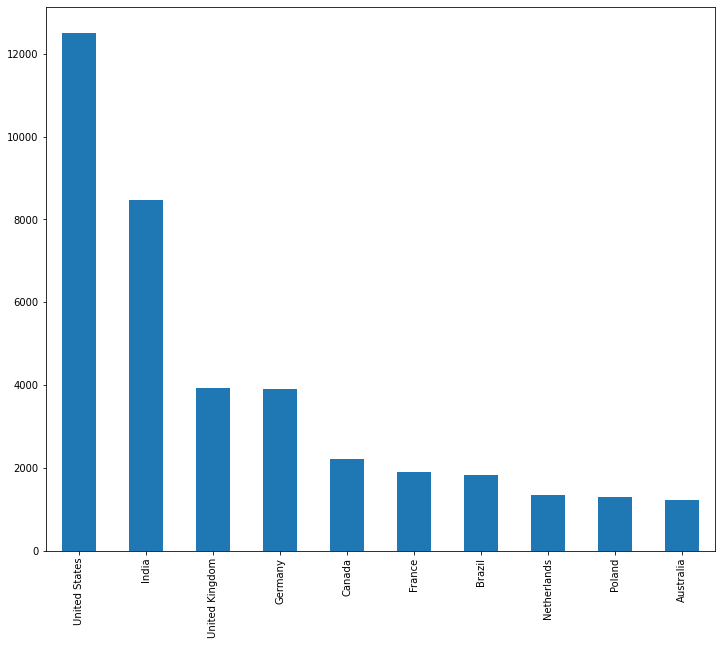

In [ ]:
df['Country'].value_counts()[0:10].plot(kind='bar',figsize=(12,10))

In [ ]:
import numpy as np
import pandas as pd
from plotly import tools
import plotly.graph_objs as go

import matplotlib.pyplot as plt
temp = pd.DataFrame(df.Gender.dropna().str.split(';').tolist()).stack().value_counts(dropna = False).sort_values(ascending = True)
labels = temp.index
values = temp.values

colors = ['gold', 'lightgreen']
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

fig.update_traces(hoverinfo='label+value', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(template = 'plotly_dark')
fig.show()

In [ ]:
temp = pd.DataFrame(df.Country.value_counts()).reset_index()
temp.rename(columns={'index':'Country','Country':'value'}, inplace=True)

fig = go.Figure(data=go.Choropleth(
    locations = temp['Country'],
    z = temp['value'],
    text = temp['Country'],
    locationmode='country names',
    colorscale = 'bluered',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_title = 'Count of the<br>Participants',
))

fig.update_layout(
    title_text='Where are they From?',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),

)

fig.show()

In [ ]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [ ]:
temp = df.UndergradMajor.value_counts(dropna = False).sort_values(ascending = True)
trace = go.Bar(
    x = temp.values,
    y = temp.index,
    orientation = 'h',
    marker = dict(
        colorscale = 'Greens',
    )

)
layout = dict(
    title = 'What is/was Their Major in College?',
    height = 800,
    margin = dict(
        l=450,
    )
)
data =[trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [ ]:
temp = df.Employment.value_counts(dropna = False)
data = go.Bar(
    y = temp.values,
    x = temp.index,
#     orientation = 'h',
    marker = dict(
        colorscale = 'Greens',
    )

)
layout = dict(
    title = 'Who Took the Surveys?',
    height = 800,
#     xaxis = '# of Participants',
    margin = dict(
#         l=300,
    )
)
fig = go.Figure(data = data, layout = layout)
fig.show()

In [ ]:
temp = df.OrgSize.value_counts(dropna = False)
labels = temp.index
values = temp.values

colors = ['gold', 'lightgreen']
# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])

fig.update_traces(hoverinfo='label+value', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
# fig.update_layout(template = 'plotly_dark')
fig.show()

In [ ]:
temp = pd.DataFrame(df.PlatformWorkedWith.dropna().str.split(';').tolist()).stack().value_counts().sort_values(ascending = True)

trace = go.Bar(
    x = temp.values,
    y = temp.index,
    orientation = 'h',
    marker = dict(
        color = 'rgba(50, 205, 50, 0.6)',
        line = dict(
            color = 'rgba(0, 0, 0, 1.0)',
            width = 2))

)
layout = dict(
    title = 'What Platform did They Work With?',
    height = 1000,
    #xaxis = '# of Participants',
    margin = dict(
        l=210,
    )
)
data =[trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [ ]:
temp = df.YearsCodePro.value_counts(dropna = False)

trace = go.Bar(
    y = temp.values,
    x = temp.index,
    marker = dict(
        colorscale = 'Greens',
        line = dict(
            color = 'rgba(0, 0, 0, 1.0)',
            width = 2)
    )

)
layout = dict(
    title = 'How many years of experience do they have?',
    height = 800,
    margin = dict(
#         l=290,
    )
)
data =[trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [ ]:
temp = df.Hobbyist.value_counts(dropna = False)
labels = temp.index
values = temp.values

colors = ['gold', 'lightgreen']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])

fig.update_traces(hoverinfo='label+value', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(template = 'plotly_dark')
fig.show()

----------------------------------------------------------------------------------

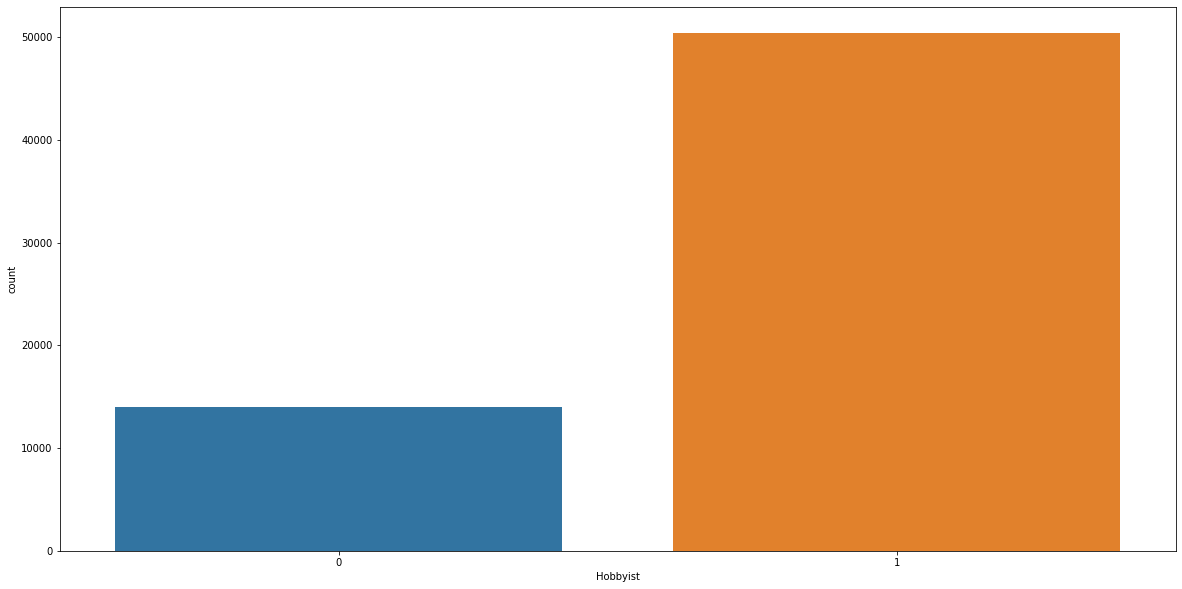

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(df['Hobbyist'])

In [ ]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

##Hypothesis Testing

In [ ]:
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2_contingency
import scipy.stats as st
from scipy.stats import shapiro
from numpy import exp
from scipy.stats import boxcox
from matplotlib import pyplot

In [ ]:
dataset=df[['Age','CompTotal','Ethnicity','JobSeek','UndergradMajor','Employment','CompFreq','WorkWeekHrs','Gender']]

In [ ]:
dataset.shape

(64461, 9)

In [ ]:
dataset.dropna(how='any',inplace=True)

In [ ]:
dataset['Gender']=['M' if i=='Man' else 'F' for i in dataset['Gender']]
list1=['White or of European descent','South Asian','Hispanic or Latino/a/x','Black or of African descent','Southeast Asian'  ]
dataset['Ethnicity']=dataset['Ethnicity'].apply(lambda x: x if x in list1 else "Others")

In [ ]:
dataset.isnull().sum()

Age               0
CompTotal         0
Ethnicity         0
JobSeek           0
UndergradMajor    0
Employment        0
CompFreq          0
WorkWeekHrs       0
Gender            0
dtype: int64

In [ ]:
data_cluster1=dataset
dataset=dataset[dataset['CompFreq']=='Yearly']


In [ ]:

cleaned_data = dataset[dataset['Age'].apply(lambda x: np.abs(x - dataset['Age'].mean()) / dataset['Age'].std() < 3)]
final_df = cleaned_data[cleaned_data['CompTotal'].apply(lambda x: np.abs(x - cleaned_data['CompTotal'].mean()) / cleaned_data['CompTotal'].std() < 3)]
number_of_rows_after_removal = final_df.shape[0]


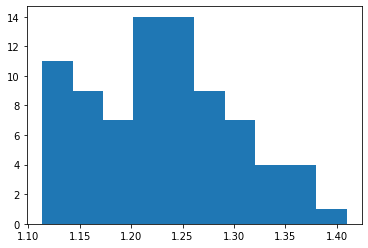

In [ ]:
from numpy import exp
from scipy.stats import boxcox
from matplotlib import pyplot
# sample=dataset['Age'].head(20)
sample = np.log(final_df['Age'].head(80))
# # power transform
sample = boxcox(sample, 0)
# histogram
pyplot.hist(sample)
pyplot.show()

Shapiro Wilk test of Normality

In [ ]:
stat, p = shapiro(sample)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.971, p=0.069
Sample looks Gaussian (fail to reject H0)


In [ ]:
sample=pd.DataFrame(sample)

In [ ]:
random_sample=sample.sample(n=20, replace=True, random_state=1)

###Hypothesis 1
Average age of stack overflow's survey is more than 1.2. A random sample of 20 entries of age is given above. A researcher claims that average age has been increased? Is there enough evidence to support the researcher's claim at alpha=0.10?

In [ ]:
alpha=0.01
# H0 = population mean ; Ha>population mean
n = 20
xbar = random_sample[0].mean()
mu = sample[0].mean()
sigma = sample[0].std()
z = (xbar -mu)/(sigma/np.sqrt(n))
z_critical =st.norm.ppf(alpha)
if(z<z_critical):
  print('With a significance of '+ str(alpha) + '% null hypothesis cannot be rejected' )
else:
  print('With a significance of '+ str(alpha) + '% null hypothesis can be rejected' )



With a significance of 0.01% null hypothesis can be rejected


###Hypothesis 2
There is a claim that gender and Employment is dependent. Can the claim be accepted

In [ ]:
#H0 - Gender and employment are independent
#H1 - Gender and employment are not independent

In [ ]:
random_sample1=final_df.sample(n=100, replace=True, random_state=1)

In [ ]:
 voter_tab = pd.crosstab(random_sample1['Gender'], random_sample1['Employment'], margins = True)


In [ ]:
observed = voter_tab.iloc[0:2,0:2]

In [ ]:
stats,p,dof,expected=st.chi2_contingency(observed= observed)

In [ ]:
print(p)

0.40252351140979226


In [ ]:
if p<0.05:
  print('Reject Null Hyothesis. Gender and Employment are not independent')
else:
  print('Do no reject Null Hyothesis. Gender and Employment are independent')



Do no reject Null Hyothesis. Gender and Employment are independent


The gender and employment are two independent columns. Through this we can identify that there is no gender bias in employment.

###Hypothesis 3
There is a claim that employment and ethnicity are dependent.

In [ ]:
#H0 - Employment and ethnicity are independent
#H1 - Employment and ethnicity are dependent

In [ ]:
voter_tab = pd.crosstab(random_sample1['Employment'], random_sample1['Ethnicity'], margins = True)


In [ ]:
observed = voter_tab.iloc[0:3,0:6]

In [ ]:
stats,p,dof,expected=st.chi2_contingency(observed= observed)

In [ ]:
print(p)

0.9999998727329258


In [ ]:
if p<0.05:
  print('Reject Null Hyothesis. Employment and Ethnicity are not independent')
else:
  print('Do no reject Null Hyothesis. Employment and Ethnicity are independent')


Do no reject Null Hyothesis. Employment and Ethnicity are independent


This shows that in there is no racial discrimination based on color or nature for employing people with a significance of 5%

###Hypothesis 4
A statistician claims that the average total compensation of women is greater than average total compensation  of men. Can it be accepted at a significance level of 0.05

In [ ]:
#H0 sample mean= pop mean
#H1 sample mean < pop mean

In [ ]:
men=random_sample1[random_sample1['Gender']=='M']
men=men.sample(n=18,replace=True,random_state=1)
women=random_sample1[random_sample1['Gender']=='F']

In [ ]:

mean=men['CompTotal'].mean()
alpha=0.1
n=18
dof=n-1
sample_mean=women['CompTotal'].mean()
critical_value=t.ppf(alpha,dof)
test_value=(sample_mean-mean)/(men['CompTotal'].std()/np.sqrt(n))
if test_value>critical_value:
  print("Reject Null Hypothesis")
else:
  print('Do not reject Null Hypothesis')

Reject Null Hypothesis


The total compensation is still varies for women and men and men earn more than women

###Hypothesis 5
A reseacher believes that mean age of women who participated in the survey is different from the mean age of the whole population. Can this claim be accepted in 0.05?

In [ ]:
#H0 sample mean= pop mean
#H1 sample mean != pop mean

In [ ]:
women_age=random_sample1[random_sample1['Gender']=='F']['Age']

In [ ]:
sample=women_age

In [ ]:

p_mean=random_sample1['Age'].mean()
p_std=random_sample1['Age'].std()
alpha=0.10
n=45
sample_mean=sample.mean()
critical_value=norm.ppf(1-(alpha/2))
test_value=(sample_mean-p_mean)/(p_std/np.sqrt(n))
if(abs(test_value)>critical_value):
  print('Reject Null Hypothesis')
else:
  print('Do not reject Null hypothesis')

Reject Null Hypothesis


##Predicting Salaries of the entries in the survey.

In [ ]:
data=dataset[dataset['CompFreq']=='Yearly']

In [ ]:
from sklearn import preprocessing
scaler=preprocessing.LabelEncoder()
data['Ethnicity']=scaler.fit_transform(data['Ethnicity'])
data['JobSeek']=scaler.fit_transform(data['JobSeek'])
data['UndergradMajor']=scaler.fit_transform(data['UndergradMajor'])
data['Gender']=scaler.fit_transform(data['Gender'])
data['Employment']=scaler.fit_transform(data['Employment'])

In [ ]:
data.drop('CompFreq',axis=1,inplace=True)


In [ ]:
data['CompTotal'].median()

90000.0

In [ ]:
X=data.drop('WorkWeekHrs',axis=1)
Y=data['WorkWeekHrs']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
# X_train=X_train.to_numpy().reshape(-1,1)
# X_test=X_test.to_numpy().reshape(-1,1)
regressor = SVR(kernel = 'poly',C=10)
regressor.fit(X_train, Y_train)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
from  sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_pred,Y_test)
mse1=mean_squared_error(regressor.predict(X_train),Y_train)

In [ ]:
print(np.sqrt(mse),np.sqrt(mse1))

15.624746591229126 14.913850401271338


In [ ]:
y_pred

array([40.1, 40.1, 40.1, ..., 40.1, 40.1, 40.1])

In [ ]:
data_cluster=data_cluster1.drop('Employment',axis=1)


In [ ]:
list1=['Age', 'CompTotal', 'Ethnicity', 'JobSeek', 'UndergradMajor', 'CompFreq', 'WorkWeekHrs', 'Gender']

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn import preprocessing
scaler=preprocessing.LabelEncoder()
data_cluster['Ethnicity']=scaler.fit_transform(data_cluster['Ethnicity'])
data_cluster['JobSeek']=scaler.fit_transform(data_cluster['JobSeek'])
data_cluster['UndergradMajor']=scaler.fit_transform(data_cluster['UndergradMajor'])
data_cluster['Gender']=scaler.fit_transform(data_cluster['Gender'])
data_cluster['CompFreq']=scaler.fit_transform(data_cluster['CompFreq'])
scaler=StandardScaler()

data_cluster=scaler.fit_transform(data_cluster)


In [ ]:
clustering_data=pd.DataFrame(data_cluster,columns=list1)


In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1,15)

for k in K:
    #Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(clustering_data)
    kmeanModel.fit(clustering_data)

    distortions.append(sum(np.min(cdist(clustering_data, kmeanModel.cluster_centers_,
                    'euclidean'),axis=1)) /clustering_data.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(clustering_data, kmeanModel.cluster_centers_,
                'euclidean'),axis=1)) / clustering_data.shape[0]
    mapping2[k] = kmeanModel.inertia_


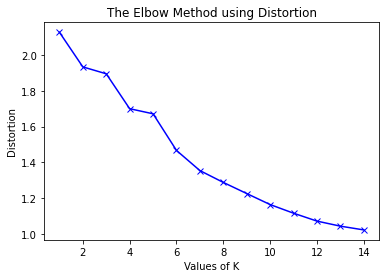

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
cluster=KMeans(n_clusters=10)
clustering_data['New']=cluster.fit_predict(clustering_data)

In [ ]:
X=clustering_data.drop('New',axis=1)
Y=clustering_data['New']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
from sklearn import metrics
print("Accuracy :",metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.8455284552845529


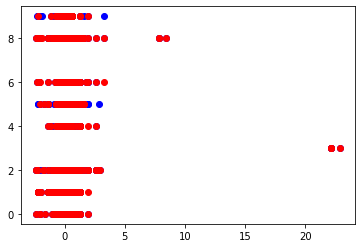

In [ ]:
plt.scatter(X_test['WorkWeekHrs'],y_test,color='blue')
plt.scatter(X_test['WorkWeekHrs'],y_pred,color='red')

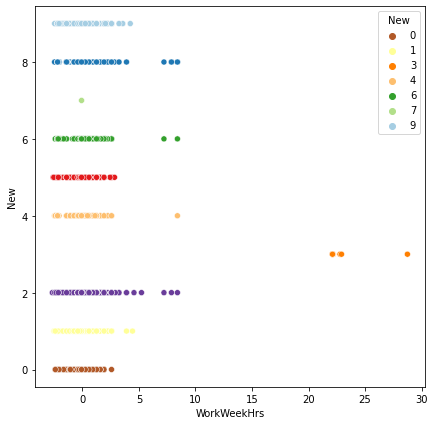

In [ ]:
fig, axes = plt.subplots(figsize=(7,7))
sns.scatterplot(x='WorkWeekHrs',y='New',data=clustering_data,hue='New',palette='Paired_r')

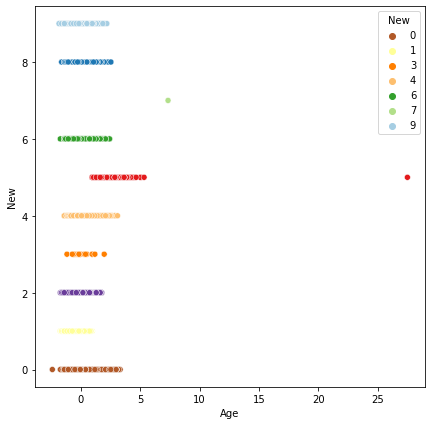

In [ ]:
fig, axes = plt.subplots(figsize=(7,7))
sns.scatterplot(x='Age',y='New',data=clustering_data,hue='New',palette='Paired_r')